<a href="https://colab.research.google.com/github/ElMartinez31/Data_Science/blob/main/Projects/Pytorch/attention_mecanism_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exemple from https://github.com/priyammaz/PyTorch-Adventures/blob/main/PyTorch%20for%20Transformers/Attention%20Mechanisms/Attention/attention_mechanism.ipynb

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### Lets Define some Random Data ###
batch_size = 4
sequence_length = 3 # 3 rows
embed_dim = 128 # 128 cols

x = torch.randn(batch_size, sequence_length, embed_dim)
print("Shape of Input is:", x.shape)

Shape of Input is: torch.Size([4, 3, 128])


In [2]:
print(x[0])

tensor([[ 9.9590e-02, -1.1695e+00,  1.7312e+00, -7.7031e-01,  5.7080e-01,
         -1.7259e+00,  1.6775e+00,  4.8589e-01, -1.0152e+00, -4.9480e-01,
         -4.5230e-02,  1.3933e+00, -2.9162e-01,  8.8782e-02, -5.2840e-01,
         -1.5177e+00, -7.8065e-01,  2.5851e+00, -4.6460e-01,  7.0644e-01,
          1.1009e+00, -5.8422e-01,  9.7801e-01,  3.1384e-02,  1.7573e+00,
         -1.1259e+00,  2.5316e-02,  1.1250e+00,  3.6496e-01,  7.4484e-01,
          1.1244e+00,  9.4252e-01, -2.8845e-01, -7.2158e-01, -5.2712e-01,
          5.0121e-01,  5.8927e-01, -7.6326e-01, -6.1938e-02, -4.3369e-01,
         -1.4464e+00,  3.3717e-01, -1.9274e+00, -7.3527e-01, -2.3908e-01,
         -9.4332e-02,  8.1856e-01,  1.0238e-01,  3.7208e-01, -4.0831e-01,
          1.0534e+00, -7.8330e-01, -3.5953e-01, -1.0684e-01, -8.2355e-02,
         -6.8751e-03, -4.6203e-01, -1.7463e+00,  8.9102e-01, -1.7375e+00,
          3.2351e-03,  2.1015e+00, -6.5562e-01,  3.7066e-01,  3.9552e-01,
         -1.1318e-02, -6.8300e-01, -1.

Step 1

Compute XXt
 which will provide the similarity score between every pair of vectors in
This will be contained inside a batch x sequence_length x sequence_length matrix

In [4]:
# similarity matrix
res = x @ x.transpose(1,2)# 1,2 car le tensor est multidim (4,3,128)
res


# res.shape # torch.Size([4, 3, 3])


tensor([[[134.4914, -19.8600,  -0.8542],
         [-19.8600, 149.9494, -10.3931],
         [ -0.8542, -10.3931, 151.1074]],

        [[154.2502,  -2.1142,   6.0908],
         [ -2.1142, 128.8848,  13.5910],
         [  6.0908,  13.5910, 125.6071]],

        [[142.6484,   4.1989,   8.5398],
         [  4.1989, 153.2547,  -1.2877],
         [  8.5398,  -1.2877, 121.1813]],

        [[118.1097,  -5.5167,  20.7462],
         [ -5.5167, 131.1252,  -2.4520],
         [ 20.7462,  -2.4520, 118.7423]]])

In [6]:
import numpy as np
res.var()#tensor(384.0310) very large var, that we want to reduce (large the embedding dim, larger the var)
# That's why we divide by sqrt(dim_embedding)


res_norm  = res/np.sqrt(embed_dim)
res.var()

tensor(4292.4810)

In [7]:
res_norm.var() #tensor(3.0002)

tensor(33.5350)

In [ ]:
res_norm # 4 batches of 3x3 matrix of similarity (but not on its final form yet)
# we want the rows to add to 1 (proba) ==> softmax

attention_matrix = res_norm.softmax(-1) # (or softmax(2) which is the very same)


attention_matrix

tensor([[[9.9931e-01, 3.6891e-04, 3.1834e-04],
         [1.3166e-05, 9.9996e-01, 3.1858e-05],
         [1.3423e-06, 3.7640e-06, 9.9999e-01]],

        [[9.9996e-01, 8.5540e-06, 2.6807e-05],
         [8.7954e-07, 1.0000e+00, 2.2784e-06],
         [2.1342e-05, 1.7641e-05, 9.9996e-01]],

        [[9.9906e-01, 1.8538e-04, 7.5534e-04],
         [3.4885e-06, 9.9998e-01, 1.4854e-05],
         [1.4729e-04, 1.5392e-04, 9.9970e-01]],

        [[9.9961e-01, 1.6618e-05, 3.7075e-04],
         [7.2044e-07, 1.0000e+00, 1.7631e-06],
         [1.4680e-05, 1.6102e-06, 9.9998e-01]]])

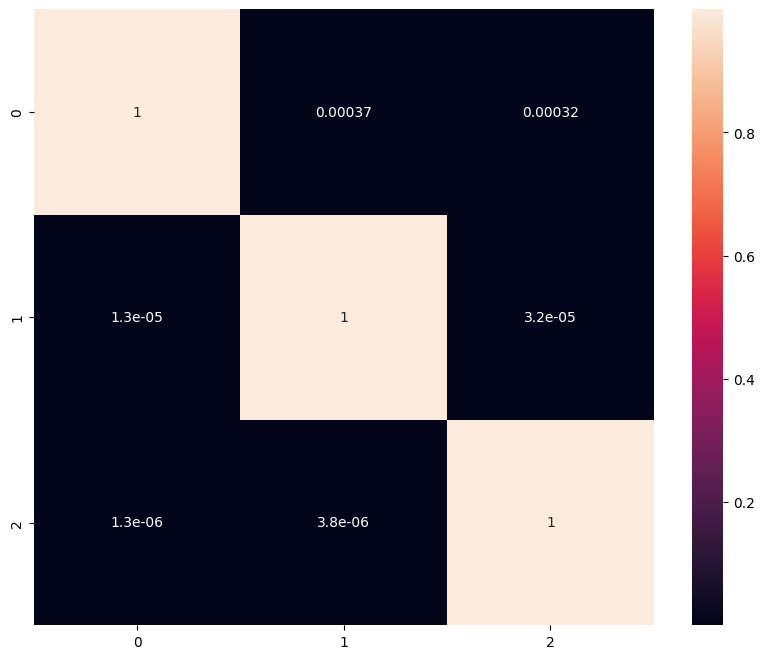

In [ ]:
attention_matrix

one = attention_matrix[0]
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,8))
sns.heatmap(one, annot = True, fmt ="0.2g")
plt.show()


In [ ]:
summed_attention_mat  = attention_matrix.sum(axis=-1)
summed_attention_mat

tensor([[1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000]])

In [ ]:
# compute output
attention_matrix.shape #torch.Size([4, 3, 3])
x.shape #torch.Size([4, 3, 128])

context_vectors  = attention_matrix @ x #should be (4,3,128)
context_vectors.shape#torch.Size([4, 3, 128])
context_vectors
# And this is attention, one of the most important technic used in AI


tensor([[[ 0.5545,  0.8880, -0.2507,  ...,  1.0814, -0.0484, -0.8474],
         [ 1.0513, -0.5523, -0.5312,  ...,  1.8571, -0.2668,  0.2580],
         [ 0.1441, -1.8767, -0.8102,  ..., -0.1960, -0.0090,  0.1419]],

        [[ 1.0454, -1.3301,  0.5929,  ...,  1.1602, -0.9664, -1.3006],
         [ 1.8356, -0.2614, -2.4894,  ...,  0.4530, -1.9985, -0.3762],
         [ 1.1905, -1.4044, -0.0158,  ...,  0.7896,  3.0875, -0.0199]],

        [[-1.1028,  0.8221, -0.4931,  ...,  0.8397, -0.3172,  0.2348],
         [ 0.0635,  0.3022,  0.9358,  ..., -1.0514,  1.1721,  0.3927],
         [ 0.5900, -0.2650,  0.9203,  ..., -0.4701,  1.3915,  0.5546]],

        [[ 0.6323,  1.0205,  0.1019,  ...,  0.5889,  0.4760,  0.7920],
         [ 0.8198, -0.5914, -0.8259,  ..., -0.7429, -1.8682,  1.2592],
         [-0.6215,  0.3486, -0.7160,  ...,  1.1727, -0.8769, -0.9450]]])

In [ ]:
# Reminder:
# if we do have a linear layer like that:
fc1 = nn.Linear(10,20) # 10in, 20 out

# and we also have a batch like that (batch_size, seq, embed_dim)
rand = torch.rand(4,6,10) #4batches of 6 tokenns which are embedded in a 10 dim

#pytorch directly multiplies the number of batches and the number of tokens for us, keeping the last dim (10 here) as the input dim


In [ ]:
# building attention (single head)

class Attention(nn.Module):
  def __init__(self, embedding_dim):
    super().__init__()
    self.embed_dim = embedding_dim
    self.query = nn.Linear(self.embed_dim, self.embed_dim)
    self.key = nn.Linear(self.embed_dim, self.embed_dim)
    self.value = nn.Linear(self.embed_dim, self.embed_dim)

  def forward(self, x):
    q = self.query(x)
    k = self.key(x)
    v =  self.value(x)
    context = (q @ k.transpose(1,2))/(self.embed_dim ** 0.5) # (batch_size, sequence_length, sequence_length)
    attention = context.softmax(axis = -1) @ v # normalise ces scores pour qu'ils somment à 1 par ligne (probabilités d'attention).
    return attention

rand = torch.rand(4,6,128)

att = Attention(128)


In [ ]:
att
#Attention(
#   (query): Linear(in_features=128, out_features=128, bias=True)
#   (key): Linear(in_features=128, out_features=128, bias=True)
#   (value): Linear(in_features=128, out_features=128, bias=True)
# )

Attention(
  (query): Linear(in_features=128, out_features=128, bias=True)
  (key): Linear(in_features=128, out_features=128, bias=True)
  (value): Linear(in_features=128, out_features=128, bias=True)
)

In [ ]:
# Now for the multi head attention we can check the reference notebook,
# but as just a reminder, for the multihead we split our embedding_dim by the number of heads
# so if our embedding_dim = 9 and we want 3 head, we will have a head_dim of 9/3
# meaning that Q, K and V will be (Seq_lenght x head_dim) => context will still be seq x seq but output will be seq x head_dim
# We do this for every head of attention (so 3 times, ) and the idea is that every head will capture a diffrent pattern.
# Then we concatenate the 3 outputs to get the final output.


# Pour gérer dynamiquempent ces différentes tetes et leurs projections (Q,K et V), nous allons utiliser 2 conteneurs pytorch:

# nn.ModuleList :
# Une liste spéciale PyTorch pour stocker des modules (comme des couches nn.Linear).
# Utilité : Permet à PyTorch de suivre les paramètres des modules pour l'apprentissage (contrairement à une liste Python standard).
# Exemple ici : Stocke les projections Q/K/V pour chaque tête.
# C’est une sous-classe de nn.Module qui sert à stocker une liste de modules PyTorch (comme nn.Linear, nn.Conv2d, etc.) tout en les enregistrant correctement dans le graphe de calcul.
# Contrairement à une simple liste Python (list), nn.ModuleList :
# enregistre les sous-modules dans le modèle principal (self)
# les prend en compte automatiquement lors de l’appel de .to(), .cuda(), .eval(), .state_dict(), etc.
# nn.Sequential applique les modules enchaînés automatiquement dans l’ordre.
# nn.ModuleList ne fait rien automatiquement. Tu dois itérer toi-même dans forward().
# Avec un nn.ModuleList, tu accèdes aux éléments via des indices

# nn.ModuleDict :
# Un dictionnaire spécial PyTorch pour stocker des modules avec des clés explicites.
# Utilité : Rend le code plus lisible en accédant aux modules par nom (ex: head["Q"]).
# Exemple ici : Stocke séparément les projections Q, K, V pour une tête.
# C’est une collection de sous-modules PyTorch stockés dans un dictionnaire (clés = noms, valeurs = modules).
# Comme nn.ModuleList, mais au lieu d’une liste ordonnée, c’est une structure clé → module, donc plus flexible pour certains designs.
# Avec un ModuleDict, tu peux accéder aux couches par leurs clés ("Q", "K", "V")

# let's code a multihead class
class MultiHeadAttention(nn.Module):
    def __init__(self, embedding_dimension, num_heads):
        super().__init__()

        ### Make sure Embedding Dimension is Divisible by Num Heads ###
        assert embedding_dimension % num_heads == 0, f"Make sure your embed_dim {embedding_dimension} is divisible by the number of heads {num_heads}"

        self.embed_dim = embed_dim
        self.num_heads = num_heads

        ### Compute Head Dimension ###
        self.head_dim = self.embed_dim // self.num_heads


        ### Create a List of Lists which has all our Q,K,V projections for each head ###
        self.multihead_qkv = nn.ModuleList()

        ### For head Head create the QKV ###
        for head in range(self.num_heads):

            ### Create a dictionary of the 3 projection  layers we need ###
            qkv_proj = nn.ModuleDict(
                [
                    ["Q", nn.Linear(self.embed_dim, self.head_dim)],
                    ["K", nn.Linear(self.embed_dim, self.head_dim)],
                    ["V", nn.Linear(self.embed_dim, self.head_dim)],
                ]
            )

            ### Store Dictionary in List ###
            self.multihead_qkv.append(qkv_proj)

        ### Create final Projection layer, it will be applied to the concatenated heads will have shape embed_dim again ###
        self.head_mesh = nn.Linear(self.embed_dim, self.embed_dim)

    def forward(self, x):

        ### Create a list ot store each heads output ###
        head_outs = []

        ### Loop Through Each head of Attention ###
        for head in self.multihead_qkv:

            ### Access layers like a dictionary (ModuleDict) ###
            ### q,k,v will be (Batch x Seq len x head_dim)
            q = head["Q"](x)
            k = head["K"](x)
            v = head["V"](x)

            ### Now do the same Attention computation as before! ###
            similarity = (q @ k.transpose(1,2)) / (self.head_dim ** 0.5)
            attention  = similarity.softmax(axis=-1)
            output = attention @ v

            ### Store this output in the head_outs ###
            head_outs.append(output)

        ### head_outs has num_heads tensors, each with the compressed embedding dimension of head_dim ###
        ### We can concatenate them all back together along the embedding dimension just like we did in the image above ###
        head_outs = torch.cat(head_outs, dim=-1) #(9,9)

        ### head_outs will have the same shape now as our input x! ###
        if head_outs.shape != x.shape:
            raise Exception("Something has gone wrong in the attention computation")

        ### Now each head was computed independently, we need them to get to know each other, so pass our head_outs through final projection ###
        output = self.head_mesh(head_outs)

        return output


embed_dim = 9
num_heads = 3
seq_len = 8
mha = MultiHeadAttention(embed_dim, num_heads)

### Create a random tensor in the shape (Batch x Seq Len x Embed Dim) ###
rand = torch.randn(3,seq_len,embed_dim)

### Pass through MHA ###
output = mha(rand)

In [ ]:
output

tensor([[[ 1.5035e-02, -5.3246e-01, -4.7115e-03,  5.5875e-01,  2.9850e-01,
           2.2946e-02, -1.8906e-01,  4.6029e-01,  1.5554e-01],
         [ 5.0744e-02, -5.0803e-01, -7.1455e-02,  5.0784e-01,  3.0439e-01,
           3.3083e-02, -1.7280e-01,  4.6787e-01,  2.1325e-01],
         [-9.1646e-02, -5.3901e-01,  8.3869e-02,  5.3256e-01,  3.6911e-01,
           7.2691e-02, -2.2168e-01,  4.4651e-01,  1.6101e-01],
         [-2.0774e-03, -4.9547e-01, -5.6488e-03,  4.7247e-01,  3.6710e-01,
           1.1976e-01, -1.5393e-01,  5.0375e-01,  1.9772e-01],
         [-2.1032e-02, -5.2656e-01,  4.9132e-02,  5.1301e-01,  3.5065e-01,
           8.5316e-02, -1.8157e-01,  4.8411e-01,  1.8964e-01],
         [ 1.1451e-03, -5.1146e-01, -4.6406e-02,  4.7722e-01,  3.4486e-01,
           8.1129e-02, -1.7450e-01,  4.6755e-01,  2.2369e-01],
         [-4.8530e-02, -5.7413e-01,  1.0848e-01,  6.0945e-01,  3.0739e-01,
          -8.5592e-05, -2.0932e-01,  4.5267e-01,  1.3236e-01],
         [-5.0189e-02, -5.4101e-01

Increasing Efficiency

We now have a successful Multihead Attention layer!! This basically has all the same math and lodgic of attention, except for one small issue: efficiency. Typically we want to avoid for loops as much as possible in our PyTorch code, being able to vectorize and do things in parallel will make much better use of the GPUs we train on. To make this more efficient though, theres something we need to understand first: PyTorch Linear layers on multidimensional tensors!

Linear Layers on MultiDimensional Tensors
We have already seen nn.Linear(input_dim, output_dim) many times already, and this module expects a tensor of shape [Batch x input_dim] and it will output [Batch x output_dim]. But what if our input is [Batch x Dim1 x Dim2 x input_dim], then what happens? Basically, PyTorch will automatically flatten all the dimensions other than the last one automagically, do the linear layer, and then return back to the expected shape, so we would get an output of [Batch x Dim1 x Dim2 x output_dim]. Another way of thinking about this is, PyTorch linear layers only are applied to the last dimension of your tensor. Lets do a quick example!

In [ ]:
fc = nn.Linear(10,30)

tensor_1 = torch.randn(5,10)
tensor_1_out = fc(tensor_1)
print("Input Shape:", tensor_1.shape, "Output Shape:", tensor_1_out.shape)

tensor_2 = torch.randn(5,1,2,3,4,10) # multidim tensor, doesnt change the idea, if last dim is = to first dim of fc, it works
tensor_2_out = fc(tensor_2)
print("Input Shape:", tensor_2.shape, "Output Shape:", tensor_2_out.shape)

# Input Shape: torch.Size([5, 10]) Output Shape: torch.Size([5, 30])
# Input Shape: torch.Size([5, 1, 2, 3, 4, 10]) Output Shape: torch.Size([5, 1, 2, 3, 4, 30])

Input Shape: torch.Size([5, 10]) Output Shape: torch.Size([5, 30])
Input Shape: torch.Size([5, 1, 2, 3, 4, 10]) Output Shape: torch.Size([5, 1, 2, 3, 4, 30])


Packing Linear Layers

Another important idea is packing our linear layers together. Lets think about our example again, each projection for Q, K and V have a Linear layer that takes in 9 values and outputs 3 values, and we repeat this 3 times for each head. Lets just think about our Queries for now.

Query for Head 1: Take in input x with embedding dim 9 and outputs tensor with embedding dimension 3

Query for Head 2: Take in input x with embedding dim 9 and outputs tensor with embedding dimension 3

Query for Head 3: Take in input x with embedding dim 9 and outputs tensor with embedding dimension 3

Well what if we reframed this? What if we had a single linear layer that take input x with embedding dim 9 and outputs something with embedding dim 9.
 Afterwards, we can cut the matrix into our three heads of attention. Lets do a quick example!

In [ ]:

tensor = torch.randn(1,8,9)
fc = nn.Linear(9,9)

### Pass tensor through layer to make Queries ###
q = fc(tensor)
print("Shape of all Queries:", q.shape)

### Cut Embedding dimension into 3 heads ###
q_head1, q_head2, q_head3 = torch.chunk(q, 3, axis=-1)
print("Shape of each Head of Query:", q_head1.shape)

Shape of all Queries: torch.Size([1, 8, 9])
Shape of each Head of Query: torch.Size([1, 8, 3])


In [ ]:
#Multidimensional mùatrix multiplication

a = torch.randn(1,2,6,4) # => will be transofrmed to (1x2,6,4) # 4 as out
b = torch.randn(2,1,4,3) #  => will be transofrmed to (1x2,4,3) # 4 as in, so @ is ok
print("Final Output Shape:", (a@b).shape) # Final Output Shape: torch.Size([2, 2, 6, 3])


#broadcasting des 2 premieres dimensions
# Quand tu fais une opération entre deux tenseurs avec des dimensions différentes, PyTorch applique le broadcasting, comme NumPy. Les règles sont :
# Si les dimensions sont égales → OK
# Si une des dimensions vaut 1 → elle est étendue à l’autre valeur (comme une copie virtuelle)
# Sinon → erreur

Final Output Shape: torch.Size([2, 2, 6, 3])


In [ ]:
Type de Tenseur           	Forme attendue	            Quand utilisé
Entrée (features)	          [B, S, D]	                  Entrée du modèle
Q, K, V	                    [B, H, S, D_head]	          Après projection
Scores d’attention          [B, H, S, S]	              Q @ K^T
Attention mask	            [B, H, S, S]                ou broadcastable à ça	Appliqué avant softmax
Output (features)	          [B, S, D]	                  Sortie du modèle

# H: num heads
# B: batch size
# S: Seq_length
# D : Embed_dim
# D_head = Embed_dim // nul_heads


# Important regarding padding !
#The model should learn the relation of how the padding tokens are related to the words
# (this is most likely just positional information that padding is at the end),
# but it should not learn how other words are related to padding,

# Function to use for padding computations:
# Tensor.masked_fill_ will fill anywhere indicated as True with our fill value.


# Self attention vs Cross Attention:
# Type d'attention	        Lignes	            Colonnes	          Ex. usage
# Self-attention	          Même séquence	      Même séquence	      BERT, GPT
# Cross-attention	          Décodeur (output)	  Encodeur (input)	  Traduction, T5, BART

SyntaxError: invalid character '’' (U+2019) (<ipython-input-18-a0dee3a15c76>, line 4)

More Efficient Attention Implementation

We will also include some extra dropout layers typically added to attention computations.

In [ ]:
class SelfAttentionEncoder(nn.Module):
    """
    Self Attention Proposed in `Attention is All  You Need` - https://arxiv.org/abs/1706.03762
    """

    def __init__(self,
               embed_dim=768,
               num_heads=12,
               attn_p=0,
               proj_p=0):


        # Args:
        #     embed_dim: Transformer Embedding Dimension
        #     num_heads: Number of heads of computation for Attention
        #     attn_p: Probability for Dropout2d on Attention cube
        #     proj_p: Probability for Dropout on final Projection


        # super(SelfAttentionEncoder, self).__init__()

        ### Make Sure Embed Dim is Divisible by Num Heads ###
        assert embed_dim % num_heads == 0
        self.num_heads = num_heads
        self.head_dim = int(embed_dim / num_heads)

        ### Define all our Projections ###
        self.q_proj = nn.Linear(embed_dim, embed_dim) # matrice de projection Wq(Embed_dim, Embed_dim)
        self.k_proj = nn.Linear(embed_dim, embed_dim)
        self.v_proj = nn.Linear(embed_dim, embed_dim)
        self.attn_drop = nn.Dropout(attn_p)

        ### Define Post Attention Projection ###
        self.proj = nn.Linear(embed_dim, embed_dim)
        self.proj_drop = nn.Dropout(proj_p)

    def forward(self, x): # x.shape = (b,seq_len, embed_dim)

        batch, seq_len, embed_dim = x.shape

        ### Compute Q, K, V Projections,and Reshape/Permute to [Batch x Num Heads x Seq Len x Head Dim]
        q = self.q_proj(x).reshape(batch, seq_len, self.num_heads, self.head_dim).transpose(1,2).contiguous()
        # X @ q_proj = X(b, seq_len, embed_dim) @ matrice(Embed_dim,Embed_dim) = Q(b, seq_len, embed_dim)
        # donc on peut bien faire le reshape ... derriere
        k = self.k_proj(x).reshape(batch, seq_len, self.num_heads, self.head_dim).transpose(1,2).contiguous()
        v = self.v_proj(x).reshape(batch, seq_len, self.num_heads, self.head_dim).transpose(1,2).contiguous()

        ### Perform Attention Computation ###
        attn = (q @ k.transpose(-2,-1)) * (self.head_dim ** -0.5) # k.transpose(-2,-1) => echange seq_len et embed_dim
        #q(b, num_heads, seq_len, head_dim) à K^t.transpose(b, num_heads, head_dim, seq_len) = (b, num_heads, seq_len,seq_len)
        attn = attn.softmax(dim=-1)
        attn = self.attn_drop(attn)
        x = attn @ v # (b, num_heads, seq_len,seq_len) @ (b, num_heads, seq_len, head_dim) = (b, num_heads, seq_len, head_dim)

        ### Bring Back to [Batch x Seq Len x Embed Dim] ### cause num_heads * head_dim = embed_dim
        x = x.transpose(1,2).reshape(batch, seq_len, embed_dim)

        ### Pass through Projection so Heads get to know each other ###
        x = self.proj(x)
        x = self.proj_drop(x)

        return x

embed_dim = 9
num_heads = 3
seq_len = 8
a = SelfAttentionEncoder(embed_dim, num_heads)

### Create a random tensor in the shape (Batch x Seq Len x Embed Dim) ###
rand = torch.randn(3,seq_len,embed_dim)

### Pass through MHA ###
output = a(rand)
print("Final Output:", output.shape)

**Attention Mask**

Masquage de padding (padding mask) : Quand les séquences d’entrée n’ont pas toutes la même longueur, on les "pad" (remplit avec des zéros ou un autre token). Il ne faut pas que le modèle prête attention à ces tokens de padding.

Masquage causal (causal mask / autoregressive mask) : Dans des tâches comme la génération de texte, un token à la position i ne doit pas voir les tokens futurs (i+1, i+2, ...). On masque donc les positions futures.

In [ ]:
### Create an example attention matrix (b x n x n) ###
rand_attn = torch.rand(1,6,6)
print("rand.shape",rand_attn.shape)

# ### Create Attention Mask in the shape (b x n) ###
attention_mask = torch.tensor([1,1,1,1,0,0]).unsqueeze(0).bool()
print("att.shape",attention_mask.shape)

print("Method 1:")
print("--------")
# ### Add Extra Dimension for the (b x n x n) ###
# ### So unsqueeze mask to be (b x 1 x n) ###
attention_mask = attention_mask.unsqueeze(1)
print(attention_mask.shape)
# # ### Unsqueezed with dummy broadcast dimension ###
print(attention_mask)
print(rand_attn.masked_fill_(~attention_mask, float("-inf")))

print("Method 2:")
print("--------")
### Repeat the Dummy Dimension so attention mask is (b x n x n) ###
attention_mask = attention_mask.repeat(1,6,1) # repeat dummy middle dim 6 times (for the seq_len)
print(attention_mask)
print(rand_attn.masked_fill_(~attention_mask, float("-inf")))

rand.shape torch.Size([1, 6, 6])
att.shape torch.Size([1, 6])
Method 1:
--------
torch.Size([1, 1, 6])
tensor([[[ True,  True,  True,  True, False, False]]])
tensor([[[0.0112, 0.2802, 0.7123, 0.2025,   -inf,   -inf],
         [0.9080, 0.6380, 0.0561, 0.3039,   -inf,   -inf],
         [0.8084, 0.5600, 0.9836, 0.7664,   -inf,   -inf],
         [0.8195, 0.6540, 0.8167, 0.9122,   -inf,   -inf],
         [0.0505, 0.2526, 0.3384, 0.7304,   -inf,   -inf],
         [0.8166, 0.2807, 0.4933, 0.8058,   -inf,   -inf]]])
Method 2:
--------
tensor([[[ True,  True,  True,  True, False, False],
         [ True,  True,  True,  True, False, False],
         [ True,  True,  True,  True, False, False],
         [ True,  True,  True,  True, False, False],
         [ True,  True,  True,  True, False, False],
         [ True,  True,  True,  True, False, False]]])
tensor([[[0.0112, 0.2802, 0.7123, 0.2025,   -inf,   -inf],
         [0.9080, 0.6380, 0.0561, 0.3039,   -inf,   -inf],
         [0.8084, 0.5600, 0.9

0️⃣ Contexte — Nos phrases
On a un batch de 2 phrases : (B, seq_len) = (2,4)

Batch	Phrase originale	Tokens (IDs)

0	"je mange"	[12, 45]

1	"tu bois du café"	[33, 67, 90, 123]

1️⃣ Padding à longueur max
La plus longue phrase a 4 tokens → S = 4.
On pad la plus courte à droite :

Batch 0 : [12, 45, 0, 0]      # "je", "mange", PAD, PAD

Batch 1 : [33, 67, 90, 123]   # "tu", "bois", "du", "café"

2️⃣ Mask initial (B, S)

Règle : 1 = mot réel, 0 = PAD.


attention_mask =
tensor(

[[1, 1, 0, 0],  
[1, 1, 1, 1]])  

3️⃣ Après unsqueeze(1).unsqueeze(1) → (B, 1, 1, S)

On ajoute deux dimensions au milieu :


Batch 0 ("je mange"):

[[[1, 1, 0, 0]]]

Batch 1 ("tu bois du café"):

[[[1, 1, 1, 1]]]

4️⃣ Après repeat(1, 1, S, 1) → (B, 1, S, S)

On répète la ligne S fois pour créer la grille (S, S).


Batch 0 ("je mange"):

[[[1, 1, 0, 0],

  [1, 1, 0, 0],

  [1, 1, 0, 0],

  [1, 1, 0, 0]]]

Batch 1 ("tu bois du café"):

[[[1, 1, 1, 1],

  [1, 1, 1, 1],

  [1, 1, 1, 1],

  [1, 1, 1, 1]]]

5️⃣ Après ~attention_mask

On inverse pour marquer les positions à bloquer :

(1 → False, 0 → True)


Batch 0 ("je mange"):

[[[False, False,  True,  True],

  [False, False,  True,  True],

  [False, False,  True,  True],

  [False, False,  True,  True]]]

Batch 1 ("tu bois du café"):

[[[False, False, False, False],

  [False, False, False, False],

  [False, False, False, False],

  [False, False, False, False]]]

6️⃣ Après masked_fill(..., -inf)

Si attn était rempli de zéros au départ, les positions à True (PAD) deviennent -inf :


Batch 0 ("je mange"):

[[[  0.,   0., -inf, -inf],

  [  0.,   0., -inf, -inf],

  [  0.,   0., -inf, -inf],

  [  0.,   0., -inf, -inf]]]

Batch 1 ("tu bois du café"):

[[[0., 0., 0., 0.],

  [0., 0., 0., 0.],

  [0., 0., 0., 0.],

  [0., 0., 0., 0.]]]

📌 À retenir

Sans troncature, on garde tous les mots → le mask ne met des 0 que pour les <PAD> ajoutés au remplissage.

La duplication (S, S) permet de bloquer toutes les lignes/colonnes vers les positions PAD, peu importe d’où on part dans la séquence.



In [ ]:
# Let's take our previous code and adapt it to add the padding attention masking

class SelfAttention(nn.Module):
    """
    Self Attention Proposed in `Attention is All  You Need` - https://arxiv.org/abs/1706.03762
    """

    def __init__(self,
                 embed_dim=768,
                 num_heads=12,
                 attn_p=0,
                 proj_p=0):
        """

        Args:
            embed_dim: Transformer Embedding Dimension
            num_heads: Number of heads of computation for Attention
            attn_p: Probability for Dropout2d on Attention cube
            proj_p: Probability for Dropout on final Projection
        """

        super(SelfAttention, self).__init__()

        ### Make Sure Embed Dim is Divisible by Num Heads ###
        assert embed_dim % num_heads == 0
        self.num_heads = num_heads
        self.head_dim = int(embed_dim / num_heads)

        ### Define all our Projections ###
        self.q_proj = nn.Linear(embed_dim, embed_dim)
        self.k_proj = nn.Linear(embed_dim, embed_dim)
        self.v_proj = nn.Linear(embed_dim, embed_dim)
        self.attn_drop = nn.Dropout(attn_p)

        ### Define Post Attention Projection ###
        self.proj = nn.Linear(embed_dim, embed_dim)
        self.proj_drop = nn.Dropout(proj_p)

    def forward(self, x, attention_mask=None):

        batch, seq_len, embed_dim = x.shape

        ### Compute Q, K, V Projections,and Reshape/Permute to [Batch x Num Heads x Seq Len x Head Dim]
        q = self.q_proj(x).reshape(batch, seq_len, self.num_heads, self.head_dim).transpose(1,2).contiguous()
        k = self.k_proj(x).reshape(batch, seq_len, self.num_heads, self.head_dim).transpose(1,2).contiguous()
        v = self.v_proj(x).reshape(batch, seq_len, self.num_heads, self.head_dim).transpose(1,2).contiguous()

        ### Perform Attention Computation ###
        attn = (q @ k.transpose(-2,-1)) * (self.head_dim ** -0.5)

        ####################################################################################
        ### FILL ATTENTION MASK WITH -Infinity ###

        ### NOTE:
        ### attn.shape - (Batch x num_heads x seq_len x seq_len)
        ### mask.shape - (Batch x seq_len)

        if attention_mask is not None:

            attention_mask = attention_mask.unsqueeze(1).unsqueeze(1).repeat(1,1,seq_len,1)
            attn = attn.masked_fill(~attention_mask, float('-inf'))# ~ to say "opposite"

        ####################################################################################

        attn = attn.softmax(dim=-1)
        attn = self.attn_drop(attn)
        x = attn @ v

        ### Bring Back to [Batch x Seq Len x Embed Dim] ###
        x = x.transpose(1,2).reshape(batch, seq_len, embed_dim)

        ### Pass through Projection so Heads get to know each other ###
        x = self.proj(x)
        x = self.proj_drop(x)

        return x




In [ ]:
### We will now have sequences of different lengths, identify the number of tokens in each sequence ###
seq_lens = [3,5,4]
embed_dim = 9
num_heads = 3
a = SelfAttention(embed_dim, num_heads)

# ### Create a random tensor in the shape (Batch x Seq Len x Embed Dim) ###
# ### This will be a tensor upto the max(seq_lens) ###
rand = torch.randn(len(seq_lens),max(seq_lens),embed_dim)#
rand.shape#torch.Size([3, 5, 9])

# ### Create Attention Mask from the seq_lens (shortest sequences padded to the longest ###
masks = torch.nn.utils.rnn.pad_sequence([torch.ones(l) for l in seq_lens], batch_first=True, padding_value=0).bool()
print("Attention Mask:")
print(masks)

### Pass through MHA ###
output = a(rand, attention_mask=masks)
print("Final Output:", output.shape)

Attention Mask:
tensor([[ True,  True,  True, False, False],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True, False]])


[tensor([1., 1., 1.]), tensor([1., 1., 1., 1., 1.]), tensor([1., 1., 1., 1.])]

In [ ]:
#Lets Incorporate the Causal Mask into Self-Attention!


class SelfAttention(nn.Module):
    """
    Self Attention Proposed in `Attention is All  You Need` - https://arxiv.org/abs/1706.03762
    """

    def __init__(self,
               embed_dim=768,
               num_heads=12,
               attn_p=0,
               proj_p=0,
               causal=False):
        """

        Args:
            embed_dim: Transformer Embedding Dimension
            num_heads: Number of heads of computation for Attention
            attn_p: Probability for Dropout2d on Attention cube
            proj_p: Probability for Dropout on final Projection
            causal: Do you want to apply a causal mask?
        """

        super(SelfAttention, self).__init__()

        ### Make Sure Embed Dim is Divisible by Num Heads ###
        assert embed_dim % num_heads == 0
        self.num_heads = num_heads
        self.head_dim = int(embed_dim / num_heads)
        self.causal = causal

        ### Define all our Projections ###
        self.q_proj = nn.Linear(embed_dim, embed_dim)
        self.k_proj = nn.Linear(embed_dim, embed_dim)
        self.v_proj = nn.Linear(embed_dim, embed_dim)
        self.attn_drop = nn.Dropout(attn_p)

        ### Define Post Attention Projection ###
        self.proj = nn.Linear(embed_dim, embed_dim)
        self.proj_drop = nn.Dropout(proj_p)

    def forward(self, x, attention_mask=None):

        batch, seq_len, embed_dim = x.shape

        ### Compute Q, K, V Projections,and Reshape/Permute to [Batch x Num Heads x Seq Len x Head Dim]
        q = self.q_proj(x).reshape(batch, seq_len, self.num_heads, self.head_dim).transpose(1,2).contiguous()
        k = self.k_proj(x).reshape(batch, seq_len, self.num_heads, self.head_dim).transpose(1,2).contiguous()
        v = self.v_proj(x).reshape(batch, seq_len, self.num_heads, self.head_dim).transpose(1,2).contiguous()

        ### Perform Attention Computation ###
        attn = (q @ k.transpose(-2,-1)) * (self.head_dim ** -0.5)

        if self.causal:
            ####################################################################################
            ### Create the Causal Mask (On the correct device) ###

            ### Create a Seq_Len x Seq_Len tensor full of Ones
            ones = torch.ones((seq_len, seq_len), device=attn.device)

            ### Fill Top right triangle with Zeros (as we dont want to attend to them) ###
            causal_mask = torch.tril(ones)

            ### Add extra dimensions for Batch size and Number of Heads ###
            causal_mask = causal_mask.reshape(1,1,seq_len,seq_len).bool()

            ### If we have padding mask, then update our causal mask ###
            if attention_mask is not None:

                ### Each sample could have a different number of pad tokens, so repeat causal mask for batch size ###
                causal_mask = causal_mask.repeat(batch, 1, 1, 1)

                ### Expand and repeat the Padding Mask (b x s) -> (b x 1 x s x s)###
                attention_mask = attention_mask.unsqueeze(1).unsqueeze(1).repeat(1,1,seq_len,1)

                ### Fill causal mask where attention mask is False with False (to ensure all padding tokens are masked out) ###
                causal_mask = causal_mask.masked_fill(~attention_mask, False)

            ### Fill attn with -inf wherever causal mask is False ###
            attn = attn.masked_fill(~causal_mask, float('-inf'))

        ####################################################################################

        attn = attn.softmax(dim=-1)
        attn = self.attn_drop(attn)
        x = attn @ v

        ### Bring Back to [Batch x Seq Len x Embed Dim] ###
        x = x.transpose(1,2).reshape(batch, seq_len, embed_dim)

        ### Pass through Projection so Heads get to know each other ###
        x = self.proj(x)
        x = self.proj_drop(x)

        return x

### We will now have sequences of different lengths, identify the number of tokens in each sequence ###
seq_lens = [3,5,4]
embed_dim = 9
num_heads = 3
a = SelfAttention(embed_dim, num_heads, causal=True)

### Create a random tensor in the shape (Batch x Seq Len x Embed Dim) ###
### This will be a tensor upto the max(seq_lens) ###
rand = torch.randn(len(seq_lens),max(seq_lens),embed_dim)

### Create Attention Mask from the seq_lens (shortest sequences padded to the longest ###
masks = torch.nn.utils.rnn.pad_sequence([torch.ones(l) for l in seq_lens], batch_first=True, padding_value=0).bool()
print("Attention Mask:")
print(masks)

### Pass through MHA ###
output = a(rand, attention_mask=masks)
print("Final Output:", output.shape)

In [ ]:
### Create a Seq_Len x Seq_Len tensor full of Ones
seq_len = 9
ones = torch.ones((seq_len, seq_len))
ones
### Fill Top right triangle with Zeros (as we dont want to attend to them) ###
causal_mask = torch.tril(ones)

# ### Add extra dimensions for Batch size and Number of Heads ###
causal_mask = causal_mask.reshape(1,1,seq_len,seq_len).bool()
causal_mask

tensor([[[[ True, False, False, False, False, False, False, False, False],
          [ True,  True, False, False, False, False, False, False, False],
          [ True,  True,  True, False, False, False, False, False, False],
          [ True,  True,  True,  True, False, False, False, False, False],
          [ True,  True,  True,  True,  True, False, False, False, False],
          [ True,  True,  True,  True,  True,  True, False, False, False],
          [ True,  True,  True,  True,  True,  True,  True, False, False],
          [ True,  True,  True,  True,  True,  True,  True,  True, False],
          [ True,  True,  True,  True,  True,  True,  True,  True,  True]]]])

In [ ]:
import torch
import torch.nn as nn

class SelfAttention(nn.Module):
    def __init__(self, embed_dim):
        super().__init__()
        self.qkv_proj = nn.Linear(embed_dim, embed_dim * 3)
        self.out_proj = nn.Linear(embed_dim, embed_dim)

    def forward(self, x):
        B, S, D = x.shape
        qkv = self.qkv_proj(x)  # shape: [B, S, 3D]
        q, k, v = qkv.chunk(3, dim=-1)  # each: [B, S, D]

        attn_scores = Q @ K.transpose(1,2) * (3embed_dim ** 0.5)  #
        attn_weights = attn_scores.softmax(dim = -1)  #
        context =    attn_weights @ V    #
        out = self.out_proj(context)
        return out


In [ ]:
import torch

mask = torch.tensor([[1, 1, 1, 0],
                     [1, 1, 0, 0]]).bool()  # shape [B, S] = [2, 4]
scores = torch.randn(2, 4, 4)  # [B, Q_len, K_len] — donc ici [2, 4, 4]

# Étape 1 : rendre le mask compatible avec scores [B, Q, K]
mask = mask.unsqueeze(1)  # Devient [B, 1, K]

# Étape 2 : appliquer le masque
masked_scores = scores.masked_fill(mask, float('-inf'))

# Étape 3 : softmax
attn_weights = torch.softmax(masked_scores, dim=-1)


In [ ]:
import torch

seq_len = 4
causal_mask = torch.tril(torch.ones(seq_len,seq_len)).bool()
